<a href="https://colab.research.google.com/github/pandu1992/PraktikumDataScience/blob/main/PRAKTIKUM_DS_RETAIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI PENJUALAN RETAIL**

# 1. PENDAHULUAN

📊 Tentang Proyek
Dalam dunia ritel, kemampuan untuk memprediksi penjualan dengan akurat sangat penting untuk membuat keputusan bisnis yang cerdas. Proyek ini berfokus pada pembuatan model untuk meramalkan penjualan dengan menggunakan dataset yang mencakup berbagai faktor yang memengaruhi penjualan, seperti RETAIL TRANSFERS	dan WAREHOUSE SALES.

Proyek ini tidak hanya bertujuan untuk memprediksi penjualan, tetapi juga mengevaluasi kinerja berbagai model, seperti regresi linear, decision tree, dan metode gradient boosting. Perbandingan ini akan membantu mengidentifikasi model yang paling efektif dalam meningkatkan akurasi peramalan penjualan di dunia ritel nyata.

🔑 Tujuan Utama:

*   ✅ Membangun dan membandingkan berbagai model untuk memprediksi penjualan ritel.
*   ✅ Menganalisis bagaimana faktor seperti RETAIL TRANSFERS dan	WAREHOUSE SALES memengaruhi penjualan.
* ✅ Menemukan model yang paling efektif untuk meramalkan penjualan di masa depan.

# 2. IMPORT PUSTAKA YANG DIBUTUHKAN

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

custom_palette = ['#1560B0', '#C33B2F', '#EAD59F', '#6AA8CD', '#D69642', '#D6E5EE', '#695D5E']
sns.set_theme(context='notebook', palette=custom_palette, style='whitegrid')

In [9]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# 3. IMPORT DATA DAN MEMAHAMI DATA

In [10]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Path to your dataset on Google Drive
file_path = '/content/drive/MyDrive/Retail_Dataset/Retail and wherehouse Sale.csv'

df = pd.read_csv(file_path)
print("First 5 records:", df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 records:    YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  


In [11]:
df.shape # digunakan untuk mengetahui jumlah baris dan kolom dalam sebuah DataFrame di pandas.

(30000, 9)

In [12]:
df.describe() #digunakan untuk menampilkan ringkasan statistik deskriptif dari data numerik dalam sebuah DataFrame pandas.

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [13]:
df.info() #digunakan untuk menampilkan ringkasan informasi tentang DataFrame dalam pandas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [14]:
# Check for missing values
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,33
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,1
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [15]:
df['ITEM CODE'].nunique() #digunakan untuk menghitung jumlah nilai unik (distinct) dalam kolom "ITEM CODE" pada DataFrame.

15668

In [16]:
df['SUPPLIER'].nunique()

290

**Initial data exploration reveals the following key points:**



*   Observations🧮: The dataset consists of 30,000 rows and 9 columns.
*   Missing Values⚠️ : There are two missing value are present in the dataset SUPPLIER dan RETAIL SALES.
*   Column Types📊 : The dataset includes a mix of integers, floats, objects values.
*Year: Only 2020 (no variation)
*Month: Ranges from 1 to 9
*Retail Sales, Transfers, Warehouse Sales:
*Mean: Retail Sales ~6.94, Transfers ~6.59, Warehouse Sales ~27.43
High Variability: Std dev is large, especially in Warehouse Sales (272.17)
*Min & Max:
*Negative values exist (e.g., -3999 in Warehouse Sales) → Possible errors or returns
*Max values are very large → Outliers likely present
*Median (50%) is low → Data distribution is skewed
*🔍 Next Steps: Handle missing values, outliers, and negative sales before modeling!

# 4. Exploratory Data Analysis

✨ Pairplot

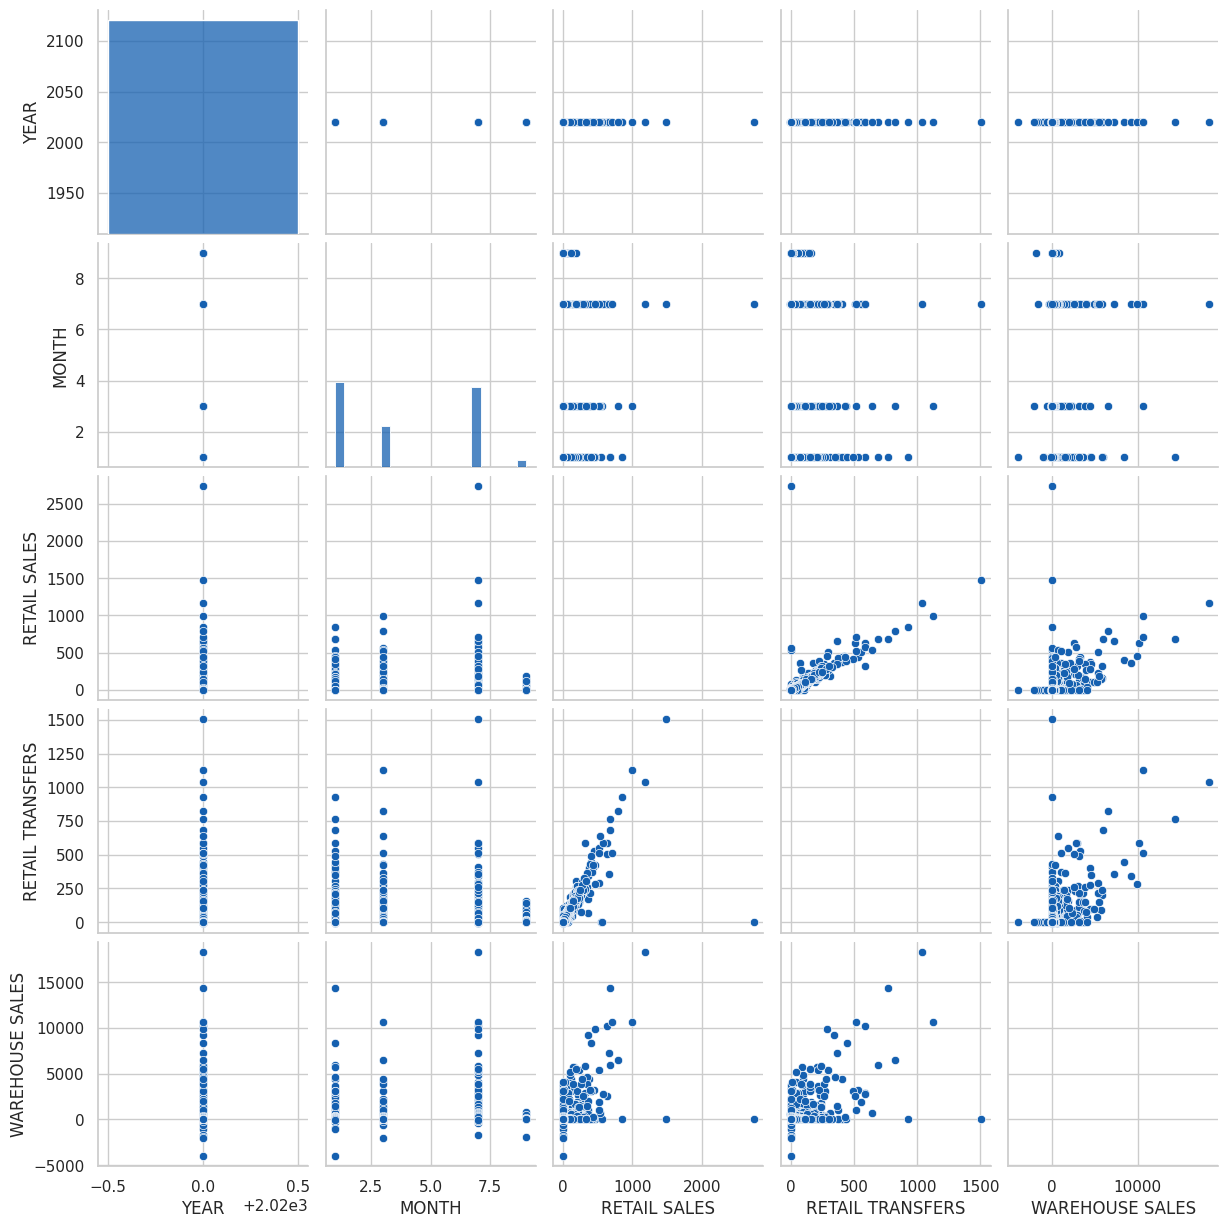

In [18]:
sns.pairplot(df)
plt.show()

📉 Histograms

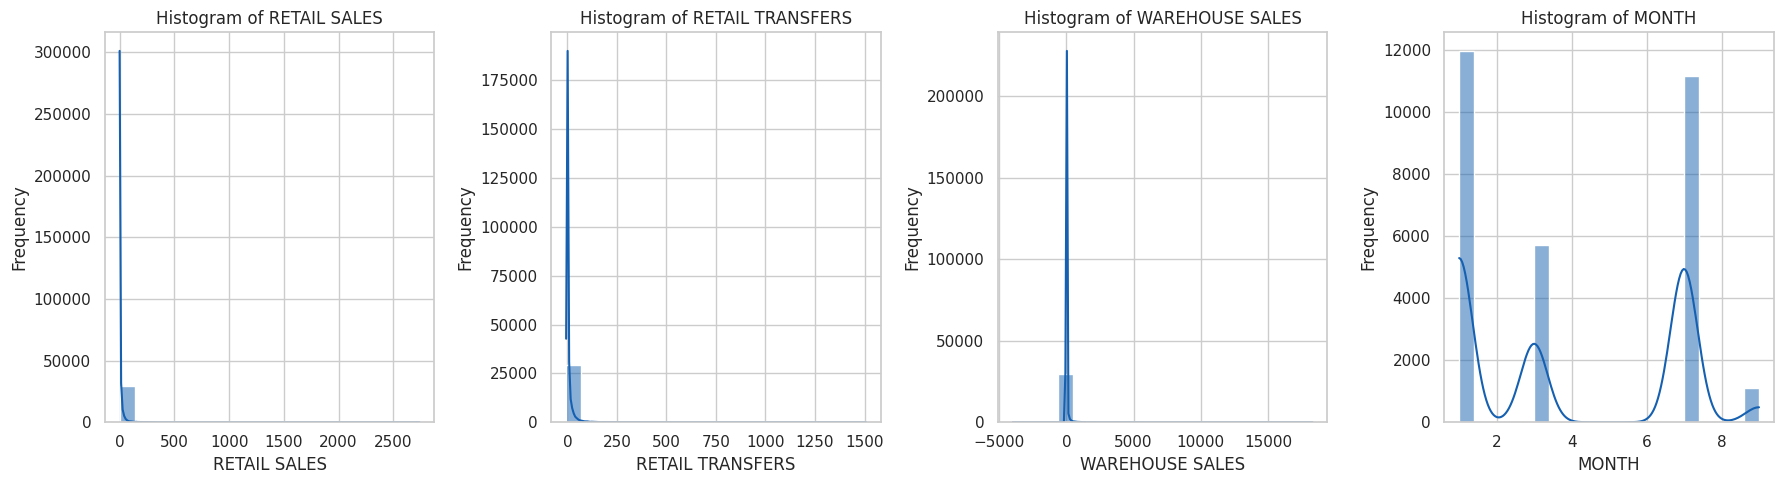

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_to_plot = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES','MONTH']

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5))  # 1 row, 4 columns

# Plot histograms on each subplot
for i, column in enumerate(numerical_cols_to_plot):
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)  # Add x-axis label
    axes[i].set_ylabel('Frequency')  # Add y-axis label

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

📊 Countplots

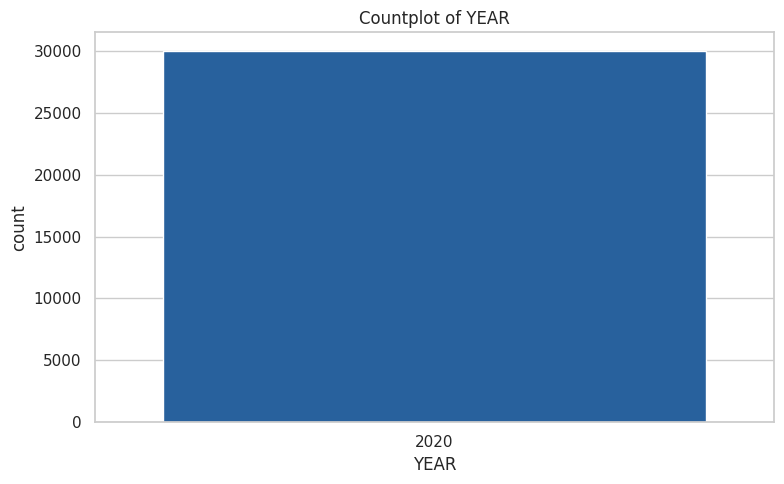

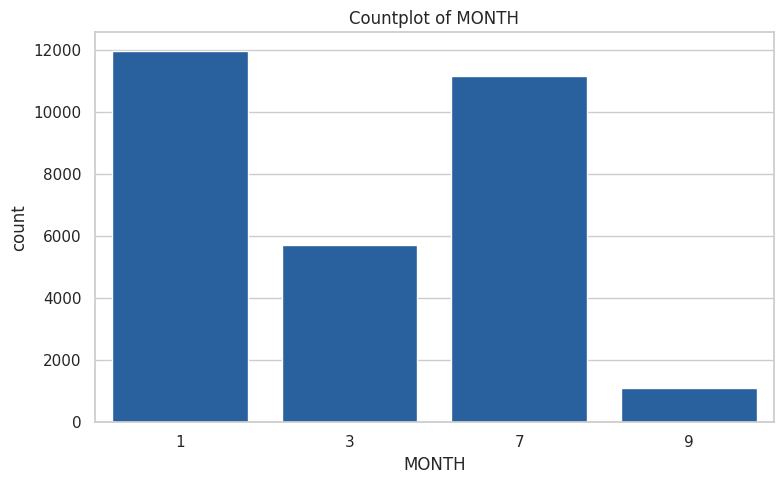

In [23]:
categorical_columns_to_plot = ['YEAR', 'MONTH']

# Plot countplots for each categorical column
for column in categorical_columns_to_plot:

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

🥧 Pie Chart

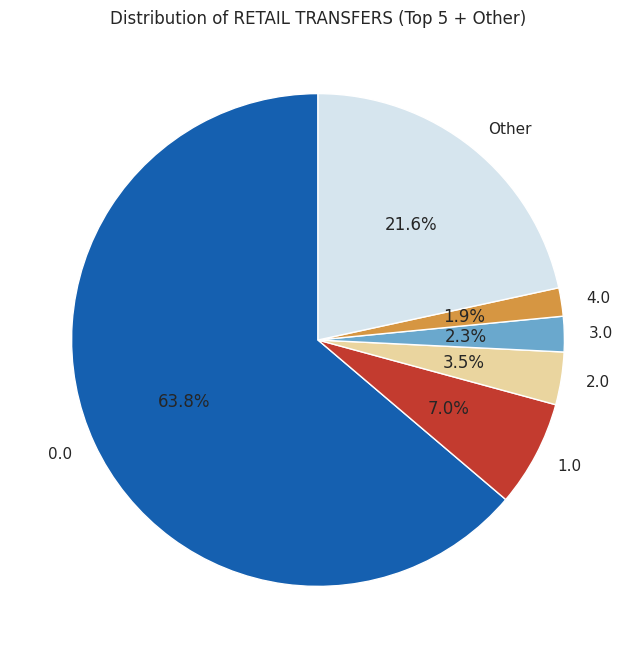

In [25]:
import matplotlib.pyplot as plt

# Get the top 5 most frequent values and their counts
top_n = 5  # Number of top values to display
top_values = df['RETAIL TRANSFERS'].value_counts().nlargest(top_n)
other_count = df['RETAIL TRANSFERS'].value_counts().sum() - top_values.sum()  # Count of all other values

# Create labels for the pie chart
labels = top_values.index.tolist() + ['Other']  # Add 'Other' category
counts = top_values.tolist() + [other_count]  # Add count for 'Other' category

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=custom_palette)
plt.title('Distribution of RETAIL TRANSFERS (Top 5 + Other)')
plt.show()

📦 Box plots

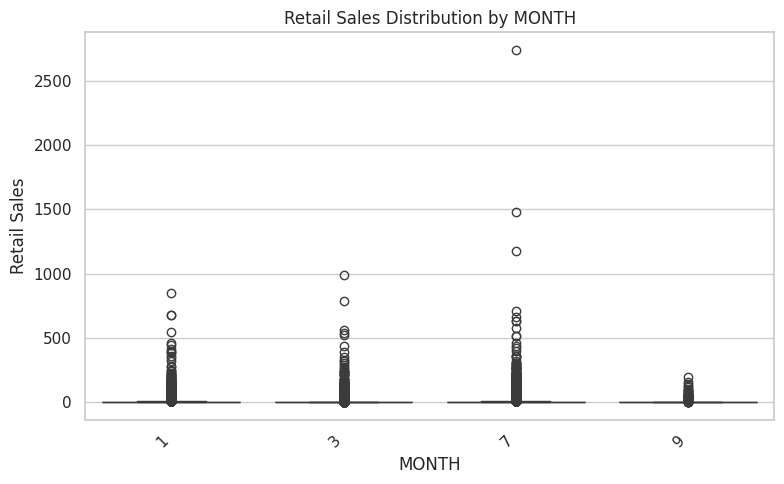

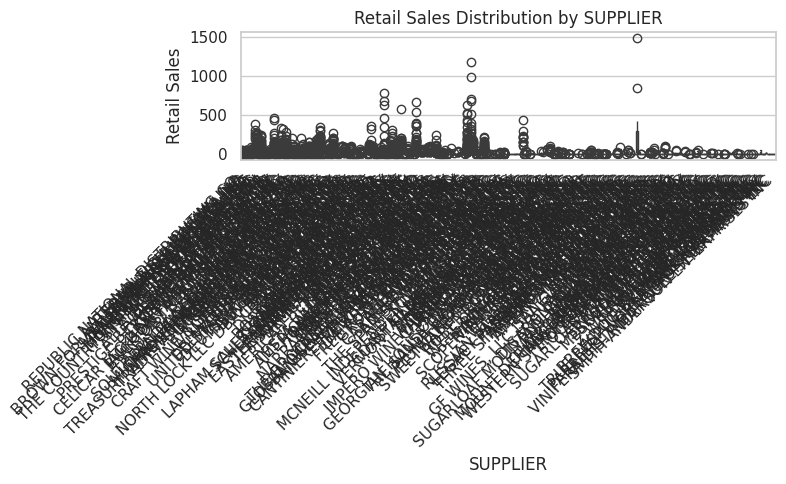

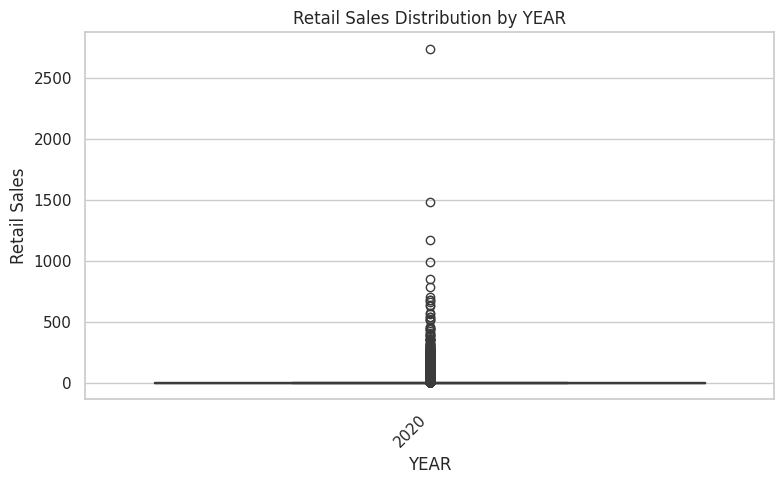

In [36]:
columns_to_plot = ['MONTH', 'SUPPLIER', 'YEAR']

# Plot box plots
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, y='RETAIL SALES')
    plt.title(f'Retail Sales Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Retail Sales')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()

🌡️ Correlation Heatmap

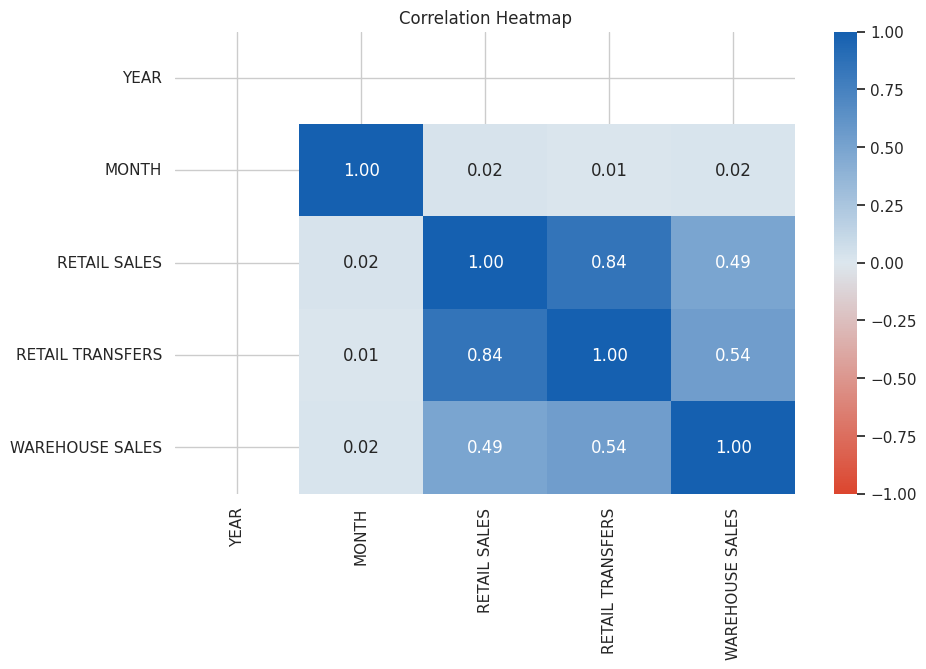

In [37]:
# Define the custom colormap
colors = ["#DC462F", "#DCE7EE", "#1560B0"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Create a correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap=cmap, center=0, vmin=-1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Observations from the visualization:
Analisis Heatmap Korelasi 🔥
*   Retail Sales & Retail Transfers (0.84) → Korelasi positif yang kuat,
menunjukkan bahwa toko dengan penjualan lebih tinggi juga cenderung melakukan lebih banyak transfer produk.
*Retail Sales & Warehouse Sales (0.49) → Korelasi sedang, berarti penjualan gudang dan penjualan ritel cenderung meningkat bersama, tetapi tidak sekuat hubungan sebelumnya.
*Retail Transfers & Warehouse Sales (0.54) → Korelasi sedang, menunjukkan bahwa transfer produk mungkin terkait dengan pergerakan stok di gudang.
*Month & Sales (≈ 0.02) → Korelasi sangat lemah, artinya pola penjualan tidak terlalu dipengaruhi oleh bulan.
*📌 Kesimpulan Utama: Retail Transfers merupakan prediktor kuat untuk Retail Sales, sementara Warehouse Sales juga berpengaruh, tetapi tidak sebesar Retail Transfers.

# 5. Machine Learning

Data Prepocessing

In [18]:
# prompt: cause we have some missing values, outliers, and negative sales in our dataset so please handle before modeling!

import numpy as np
# Handle missing values
df['SUPPLIER'].fillna(df['SUPPLIER'].mode()[0], inplace=True)
df['RETAIL SALES'].fillna(df['RETAIL SALES'].mean(), inplace=True)

# Handle negative sales
for col in ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']:
    df[col] = np.where(df[col] < 0, 0, df[col])

# Handle outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

df = remove_outliers_iqr(df, 'RETAIL SALES')
df = remove_outliers_iqr(df, 'RETAIL TRANSFERS')
df = remove_outliers_iqr(df, 'WAREHOUSE SALES')


In [19]:
# prompt: now please show the new data after we handle some missing values, outliers, and negative sales in our dataset

print(df.head())
print(df.describe())


    YEAR  MONTH                           SUPPLIER ITEM CODE  \
0   2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
2   2020      1            RELIABLE CHURCHILL LLLP      1001   
3   2020      1          LANTERNA DISTRIBUTORS INC    100145   
7   2020      1   BROWN-FORMAN BEVERAGES WORLDWIDE      1008   
13  2020      1              BACCHUS IMPORTERS LTD     10125   

                                     ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                                 BOOTLEG RED - 750ML      WINE          0.00   
2                 S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3                       SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
7   JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...      BEER          0.00   
13               NOTEWORTHY SMALL BATCH HONEY BBN 750    LIQUOR          0.34   

    RETAIL TRANSFERS  WAREHOUSE SALES  
0                0.0              2.0  
2                0.0              1.0  
3       

In [20]:
# prompt: for the null value please use some data transformation or any idea to fill out the null value? using some statistics methods maybe, please provide all complete code to run

import pandas as pd
import numpy as np

# ... (rest of your import statements)

# ... (your existing code)

# Handle missing values
# Instead of just filling with mode/mean, use more robust methods if possible

# Example using median for 'SUPPLIER' (if it's a numerical column)
# If 'SUPPLIER' is categorical use the mode imputation as it's already in your code
# Check if SUPPLIER is a numerical column
if pd.api.types.is_numeric_dtype(df['SUPPLIER']):
  df['SUPPLIER'].fillna(df['SUPPLIER'].median(), inplace=True)
else:
  df['SUPPLIER'].fillna(df['SUPPLIER'].mode()[0], inplace=True)


# For 'RETAIL SALES', consider using median or a more sophisticated method like KNN imputation
# if there are outliers. If no significant outliers are present, the mean is fine
df['RETAIL SALES'].fillna(df['RETAIL SALES'].median(), inplace=True)


# Handle negative sales (your existing code)
# ...

# Handle outliers (your existing code)
# ...

print(df.head())
print(df.describe())


    YEAR  MONTH                           SUPPLIER ITEM CODE  \
0   2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
2   2020      1            RELIABLE CHURCHILL LLLP      1001   
3   2020      1          LANTERNA DISTRIBUTORS INC    100145   
7   2020      1   BROWN-FORMAN BEVERAGES WORLDWIDE      1008   
13  2020      1              BACCHUS IMPORTERS LTD     10125   

                                     ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                                 BOOTLEG RED - 750ML      WINE          0.00   
2                 S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3                       SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
7   JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...      BEER          0.00   
13               NOTEWORTHY SMALL BATCH HONEY BBN 750    LIQUOR          0.34   

    RETAIL TRANSFERS  WAREHOUSE SALES  
0                0.0              2.0  
2                0.0              1.0  
3       

In [21]:
# Define features and target variable
# Updated with actual column names from your DataFrame
X = df[['YEAR', 'MONTH', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]
y = df['RETAIL SALES']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# prompt: help to separate which one is categorical_cols = [''] and
# numerical_cols []

# Define features (X) and target (y)
X = df.drop('RETAIL SALES', axis=1)
y = df['RETAIL SALES']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Categorical columns: ['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']
Numerical columns: ['YEAR', 'MONTH', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']


In [24]:
# Define your preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Add handle_unknown='ignore'. By adding this parameter to the OneHotEncoder, you are instructing it to ignore any unknown categories it encounters during the transform step. Instead of raising an error, it will represent these unknown categories with all zeros in the one-hot encoded columns.
    ])

🤖 Training and Comparing 10 Different Models

In [25]:
# Initialize list to collect results
results = []

# Function to evaluate models and store results for visualization
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_test = pipeline.predict(X_test)

    # Calculate metrics: R² and RMSE
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Print results
    print(f"{model_name} Model:")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}\n")

    # Append results to the list for visualization
    results.append({'Model': model_name, 'R²': test_r2, 'RMSE': test_rmse})

In [26]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'ElasticNet': ElasticNet(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bagging': BaggingRegressor()
}

In [27]:
# Iterate over the models to evaluate each
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

Linear Regression Model:
Test R²: 0.3112
Test RMSE: 0.0758

SGD Regressor Model:
Test R²: 0.3761
Test RMSE: 0.0721

Random Forest Model:
Test R²: 0.5368
Test RMSE: 0.0622

ElasticNet Model:
Test R²: -0.0002
Test RMSE: 0.0913

K-Neighbors Regressor Model:
Test R²: 0.5120
Test RMSE: 0.0638

Decision Tree Model:
Test R²: 0.4274
Test RMSE: 0.0691

SVR Model:
Test R²: 0.1838
Test RMSE: 0.0825

XGBoost Model:
Test R²: 0.5901
Test RMSE: 0.0585

Gradient Boosting Model:
Test R²: 0.5907
Test RMSE: 0.0584

Bagging Model:
Test R²: 0.5245
Test RMSE: 0.0630



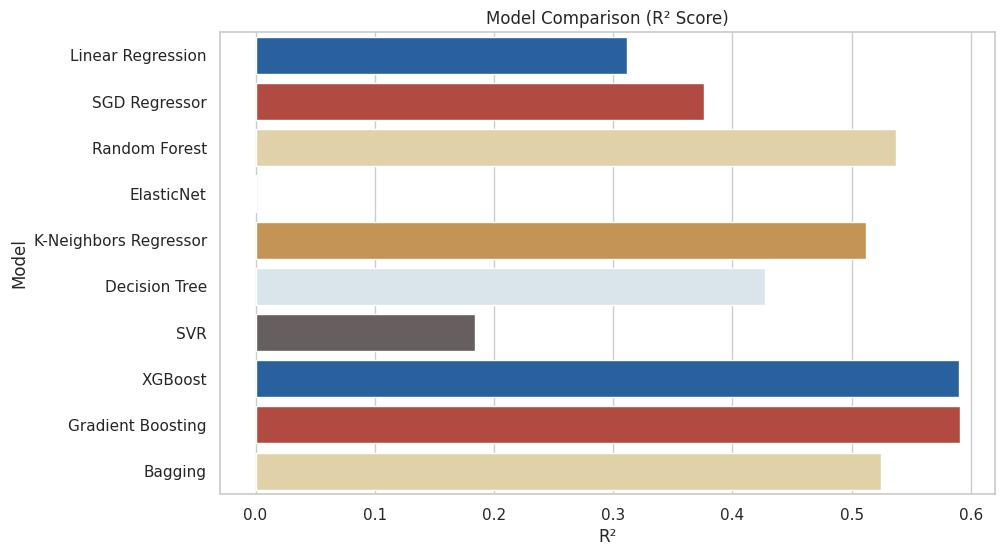

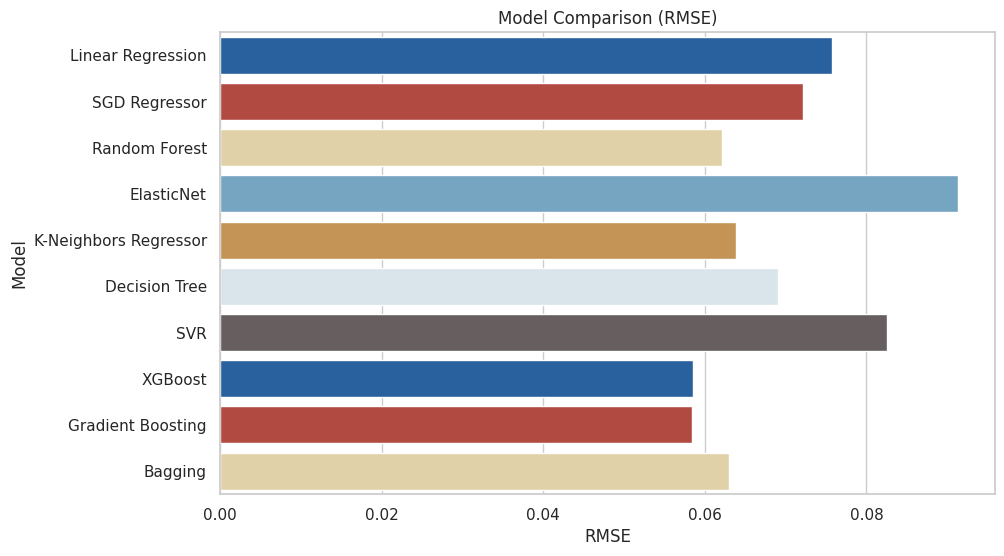

In [28]:
# Plot R² comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='R²', y='Model', data=results_df, palette=custom_palette)
plt.title('Model Comparison (R² Score)')
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette=custom_palette)
plt.title('Model Comparison (RMSE)')
plt.show()

In [29]:
## Neural Network wth TensorFlow

# Define a Sequential model
model = Sequential([
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=1, activation='relu')             # Output layer with ReLU activation (suitable for regression non-negative tasks)
])

# Compile the model with Mean Squared Error loss function
model.compile(loss = MeanSquaredError())

# Preprocess the training data using the defined preprocessor
X_train_processed = preprocessor.fit_transform(X_train) # This line is added to preprocess X_train

# Train the model using the processed training data
model.fit(X_train_processed, y_train, epochs=100)

Epoch 1/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0062
Epoch 2/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0037
Epoch 3/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0024
Epoch 4/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0019
Epoch 5/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0021
Epoch 6/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0018
Epoch 7/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0017
Epoch 8/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0014
Epoch 9/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0015
Epoch 10/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0013
Epoch 11/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0012
Epoch 12/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0013
Epoch 13/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0013
Epoch 14/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0012
Epoch 15/100
303/303 ━━━━━━━━

In [30]:
## Neural Network wth TensorFlow
from tensorflow.keras.models import Sequential # Import the Sequential class explicitly

# Define a Sequential model
model = Sequential([
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=1, activation='relu')             # Output layer with ReLU activation (suitable for regression non-negative tasks)
])

# Compile the model with Mean Squared Error loss function
model.compile(loss = MeanSquaredError())

# Preprocess the training data using the defined preprocessor
X_train_processed = preprocessor.fit_transform(X_train) # This line is added to preprocess X_train

# Train the model using the processed training data
model.fit(X_train_processed, y_train, epochs=100)

# Preprocess the test data using the same preprocessor
X_test_processed = preprocessor.transform(X_test) # Preprocess X_test before prediction

y_pred = model.predict(X_test_processed)

test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}\n")

Epoch 1/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0057
Epoch 2/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0034
Epoch 3/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0027
Epoch 4/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0021
Epoch 5/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0018
Epoch 6/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0018
Epoch 7/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0018
Epoch 8/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0016
Epoch 9/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0015
Epoch 10/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0014
Epoch 11/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0014
Epoch 12/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0014
Epoch 13/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0013
Epoch 14/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0012
Epoch 15/100
303/303 ━━━━━━━━